# time dependency
* 学習データが過去すぎると精度悪くなったり、直近の人気商品を推薦するノートブックのスコアが高い
* 過去のものを含めるべきかどうか

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import schema

In [68]:
transactions = pd.read_csv('input/transformed/transactions_train.csv', parse_dates=['t_dat'], usecols=list(schema.TRANSACTIONS.keys())+['t_dat'], dtype=schema.TRANSACTIONS)
transactions_recent = transactions.query("t_dat >= '2020-09-16'")

## 最近一週間の上位人気商品
上位3人気商品について、売れ行きの日依存性をみる

In [69]:
article_id_idxs = transactions_recent.groupby('article_id_idx').size().reset_index(name='count').sort_values(by='count', ascending=False).article_id_idx.values

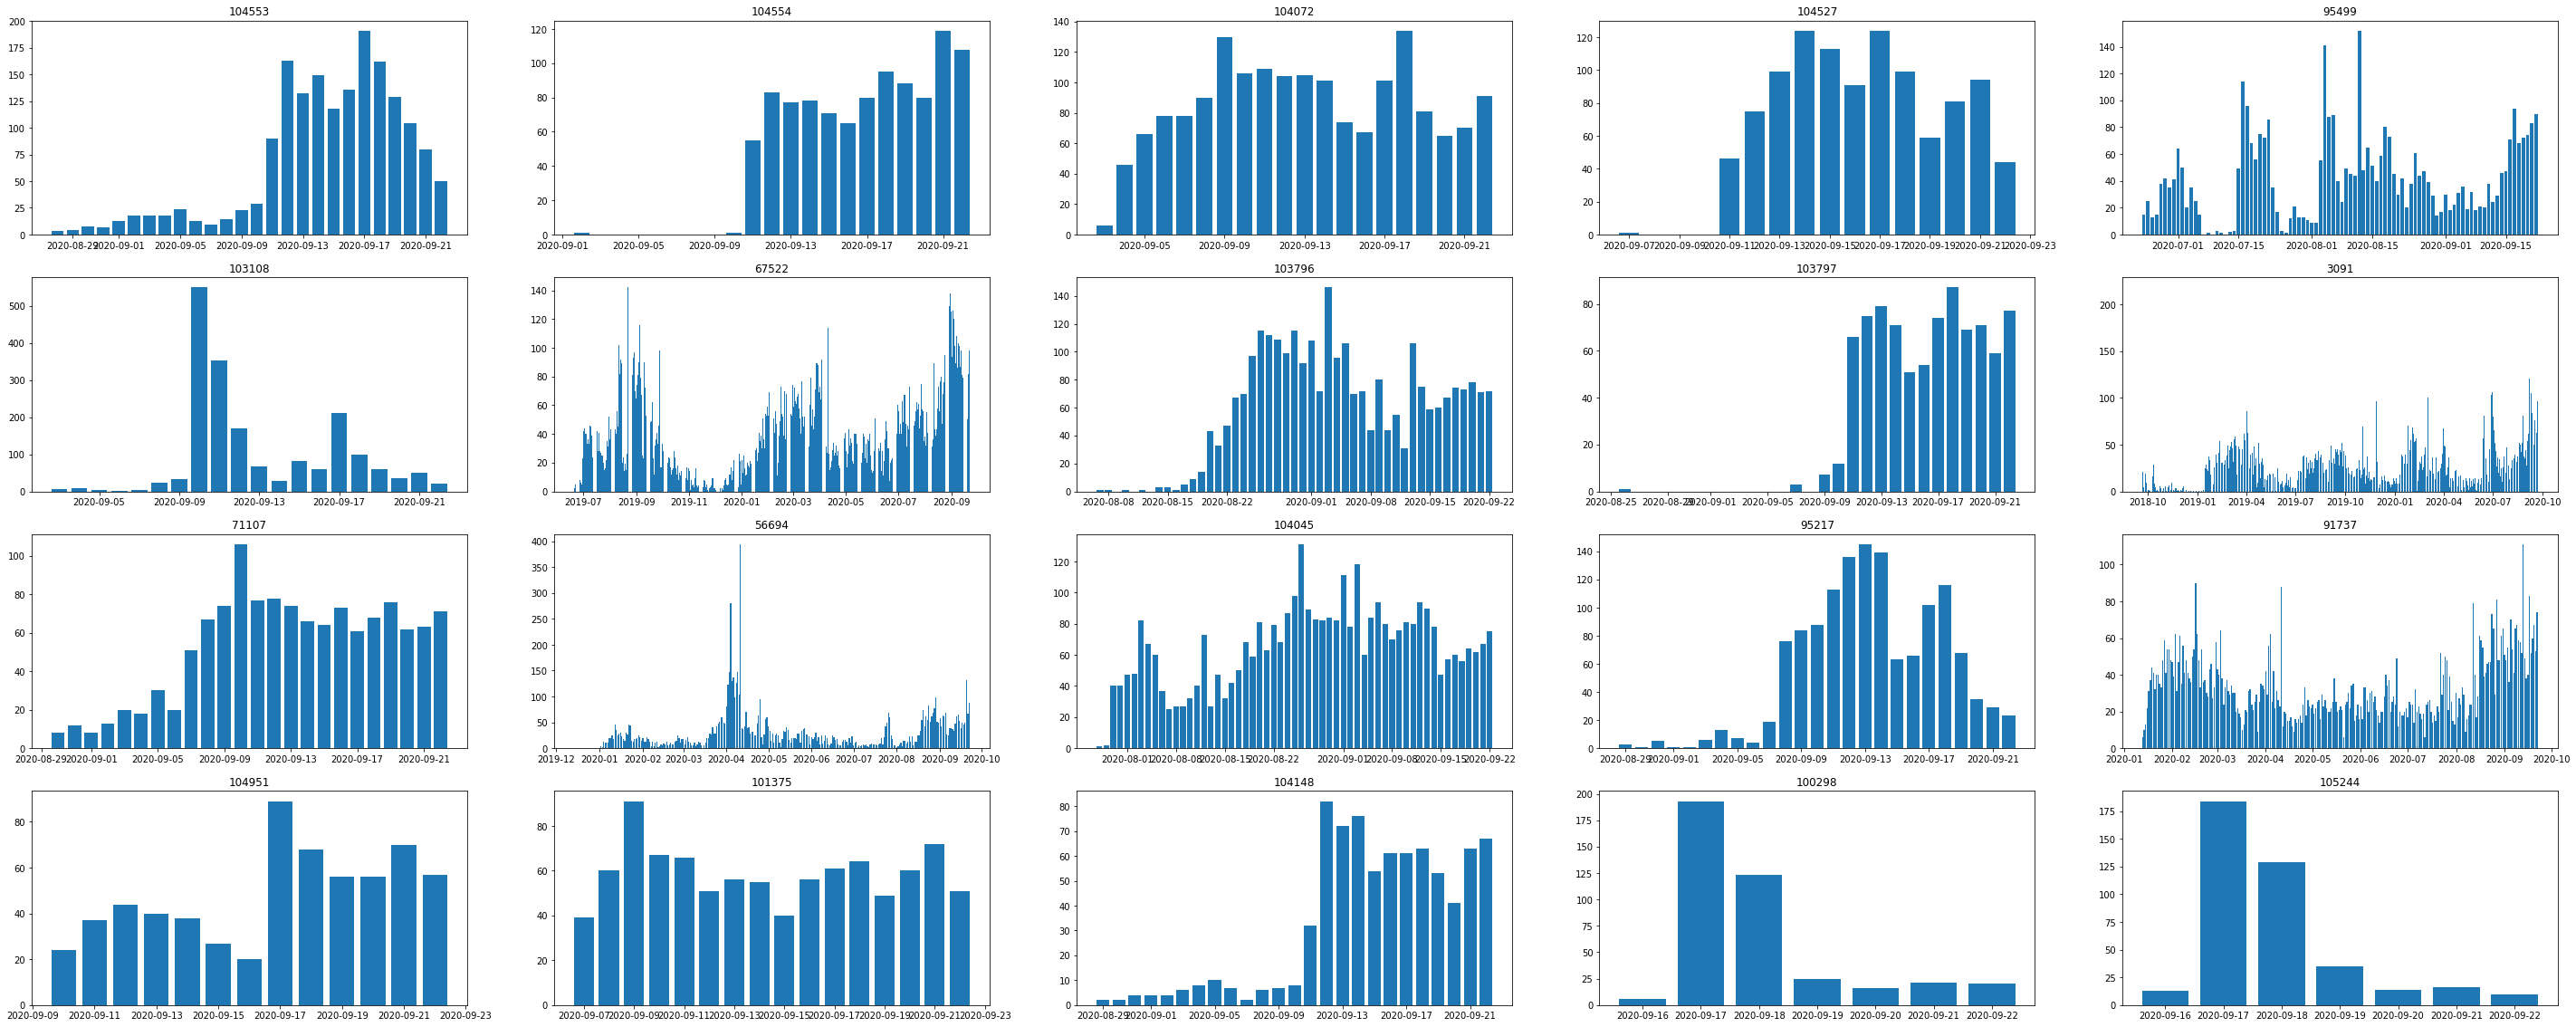

In [67]:
plt.figure(figsize=(50, 20))
for idx, article_id in enumerate(article_id_idxs[:20]):
    plt.subplot(4, 5, idx + 1)
    a = transactions.query("article_id_idx == @article_id").groupby('t_dat').size().reset_index(name='count').sort_values(by='t_dat')
    plt.title(article_id)
    plt.bar(a.t_dat, a['count'])
plt.show()

ロングセラー商品と新商品に分類される

UUIDでモデリングする場合は、直近以外のデータを使うのは危険（少なくとも、重みを減らしたり、事前学習のみに使うべき）

特徴量でモデリングする場合はその限りではないが、今の場合はテストデータのUUIDも与えられているので、UUIDベースのほうが良さそうではある

ランダムサンプリングの場合

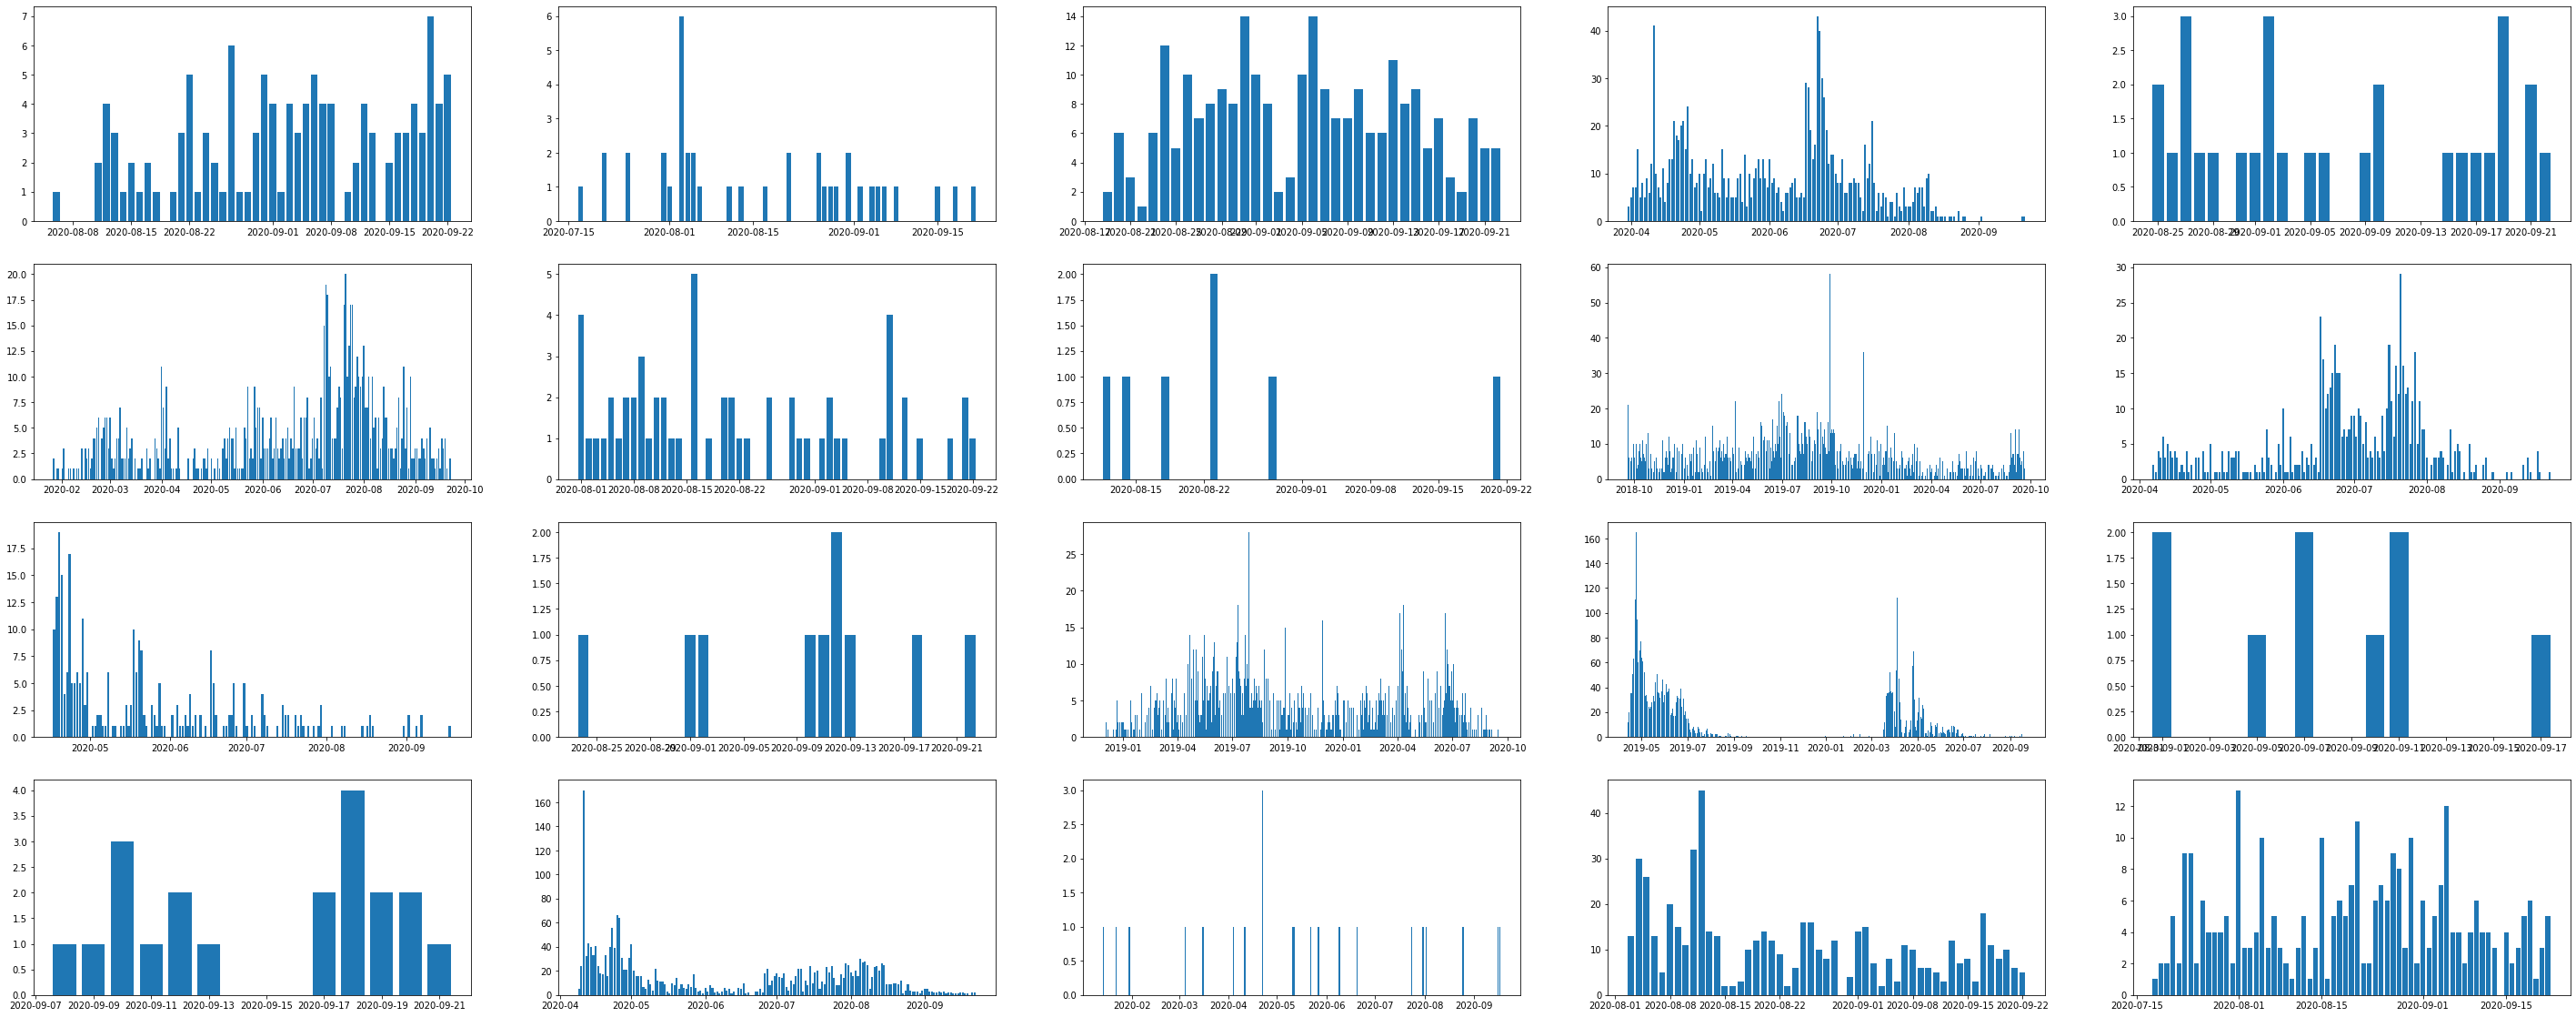

In [65]:
plt.figure(figsize=(50, 20))
for idx, article_id in enumerate(np.random.choice(article_id_idxs, 20)):
    plt.subplot(4, 5, idx + 1)
    a = transactions.query("article_id_idx == @article_id").groupby('t_dat').size().reset_index(name='count').sort_values(by='t_dat')
    plt.bar(a.t_dat, a['count'])
plt.show()

## 直近の一日あたりの売れ行きと、全体の一日あたりの売れ行きの相関

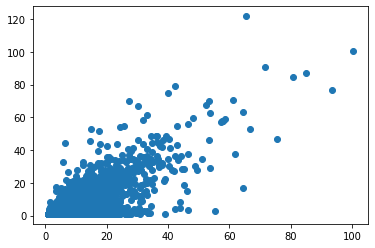

In [82]:
a = transactions.groupby(['t_dat', 'article_id_idx']).size().reset_index(name='count').groupby('article_id_idx')['count'].mean().reset_index(name='avg_all')
b = transactions_recent.groupby(['t_dat', 'article_id_idx']).size().reset_index(name='count').groupby('article_id_idx')['count'].mean().reset_index(name='avg_recent')
c = a.merge(b, on='article_id_idx')
plt.scatter(c['avg_all'], c['avg_recent'])

## sales_channel_id 依存性

In [95]:
article_id_idxs = transactions_recent.query("sales_channel_id == 0").groupby('article_id_idx').size().reset_index(name='count').sort_values(by='count', ascending=False).article_id_idx.values

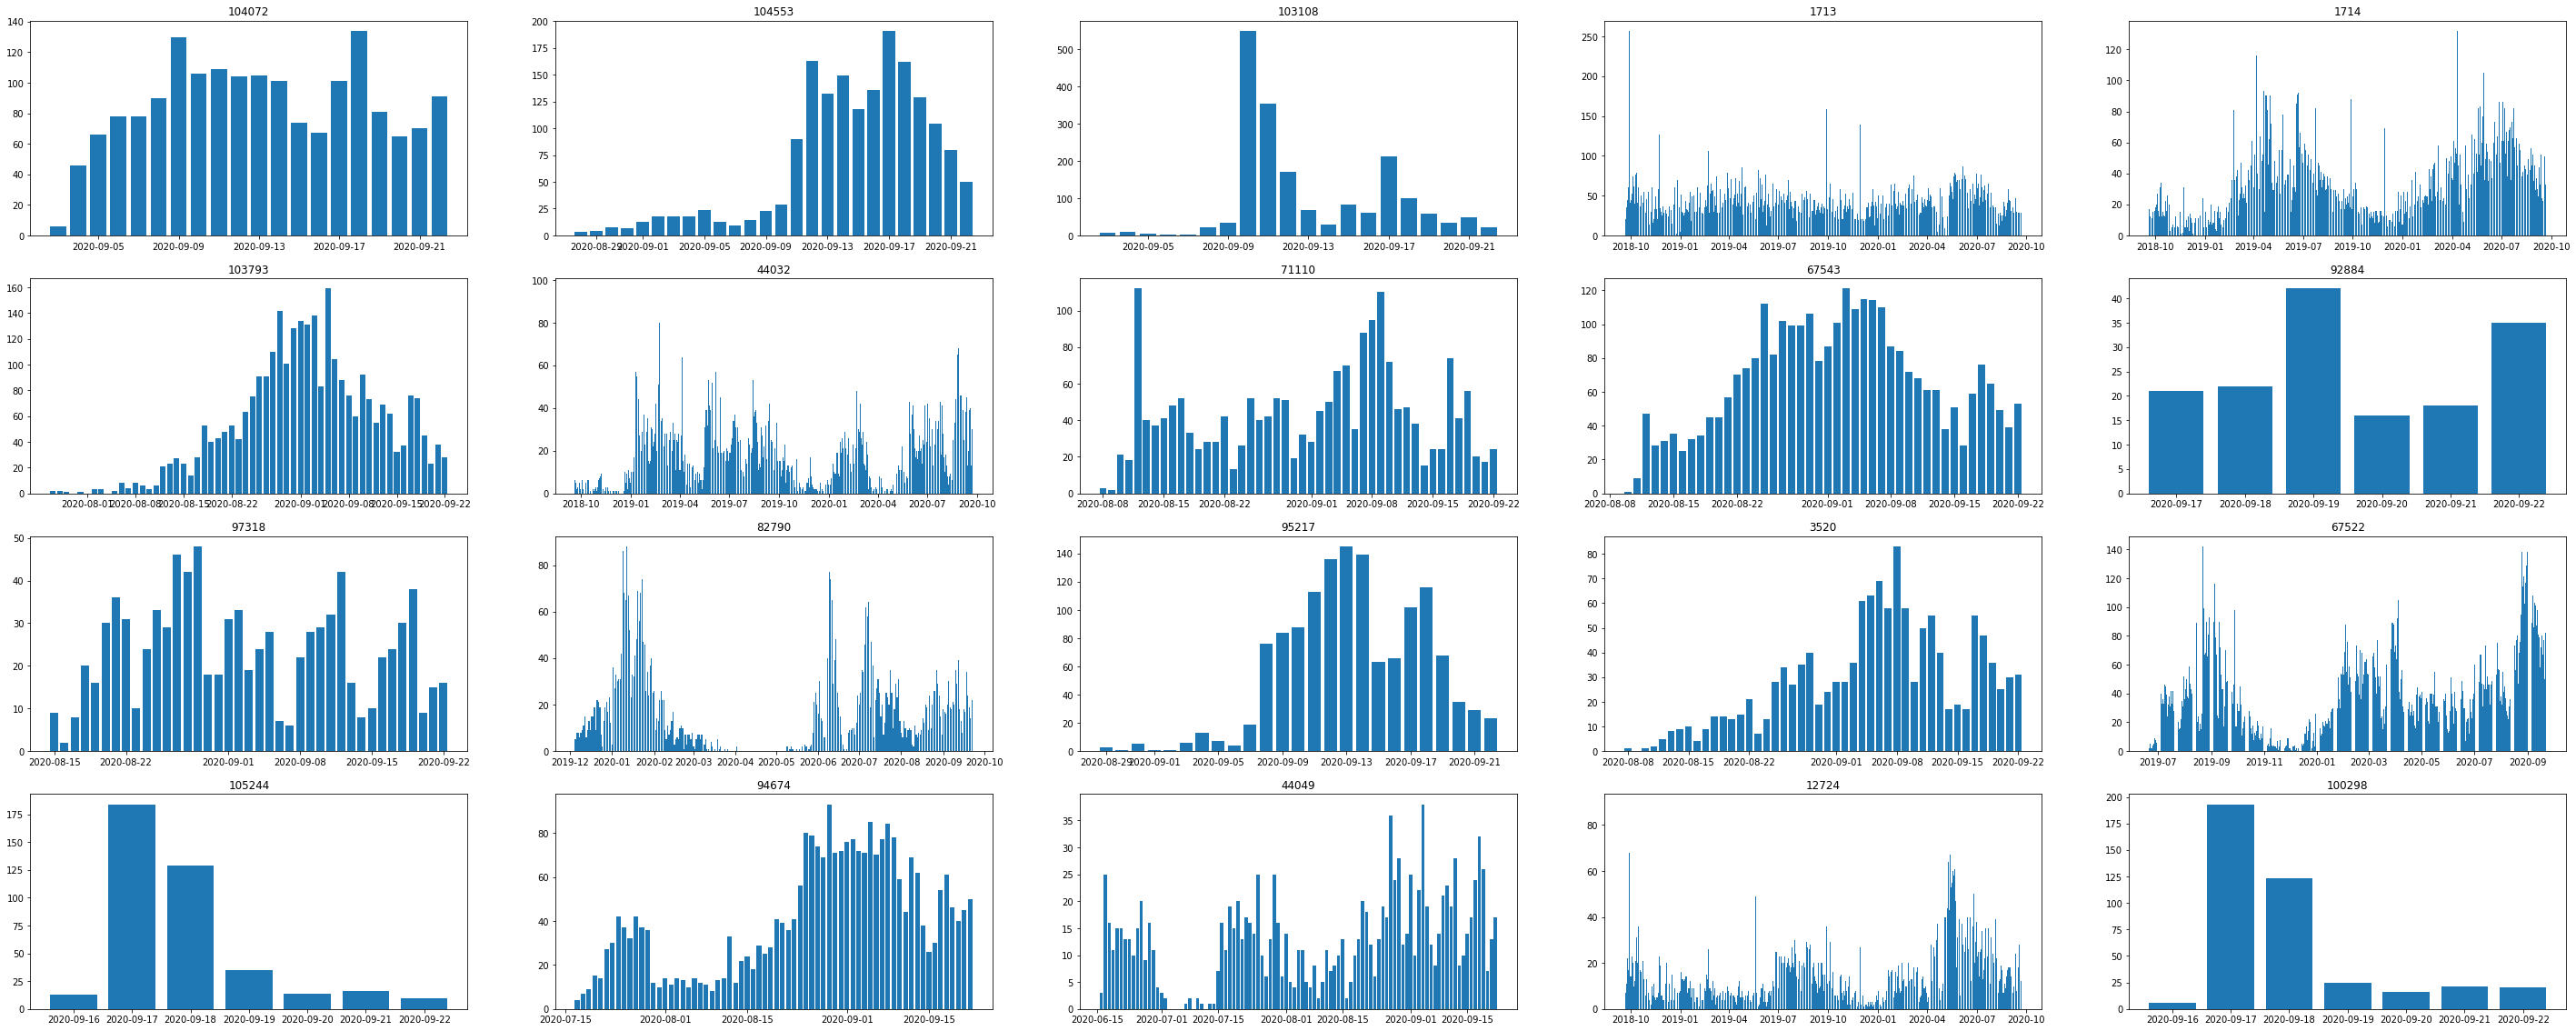

In [96]:
plt.figure(figsize=(50, 20))
for idx, article_id in enumerate(article_id_idxs[:20]):
    plt.subplot(4, 5, idx + 1)
    a = transactions.query("article_id_idx == @article_id").groupby('t_dat').size().reset_index(name='count').sort_values(by='t_dat')
    plt.title(article_id)
    plt.bar(a.t_dat, a['count'])
plt.show()

In [97]:
article_id_idxs = transactions_recent.query("sales_channel_id == 1").groupby('article_id_idx').size().reset_index(name='count').sort_values(by='count', ascending=False).article_id_idx.values

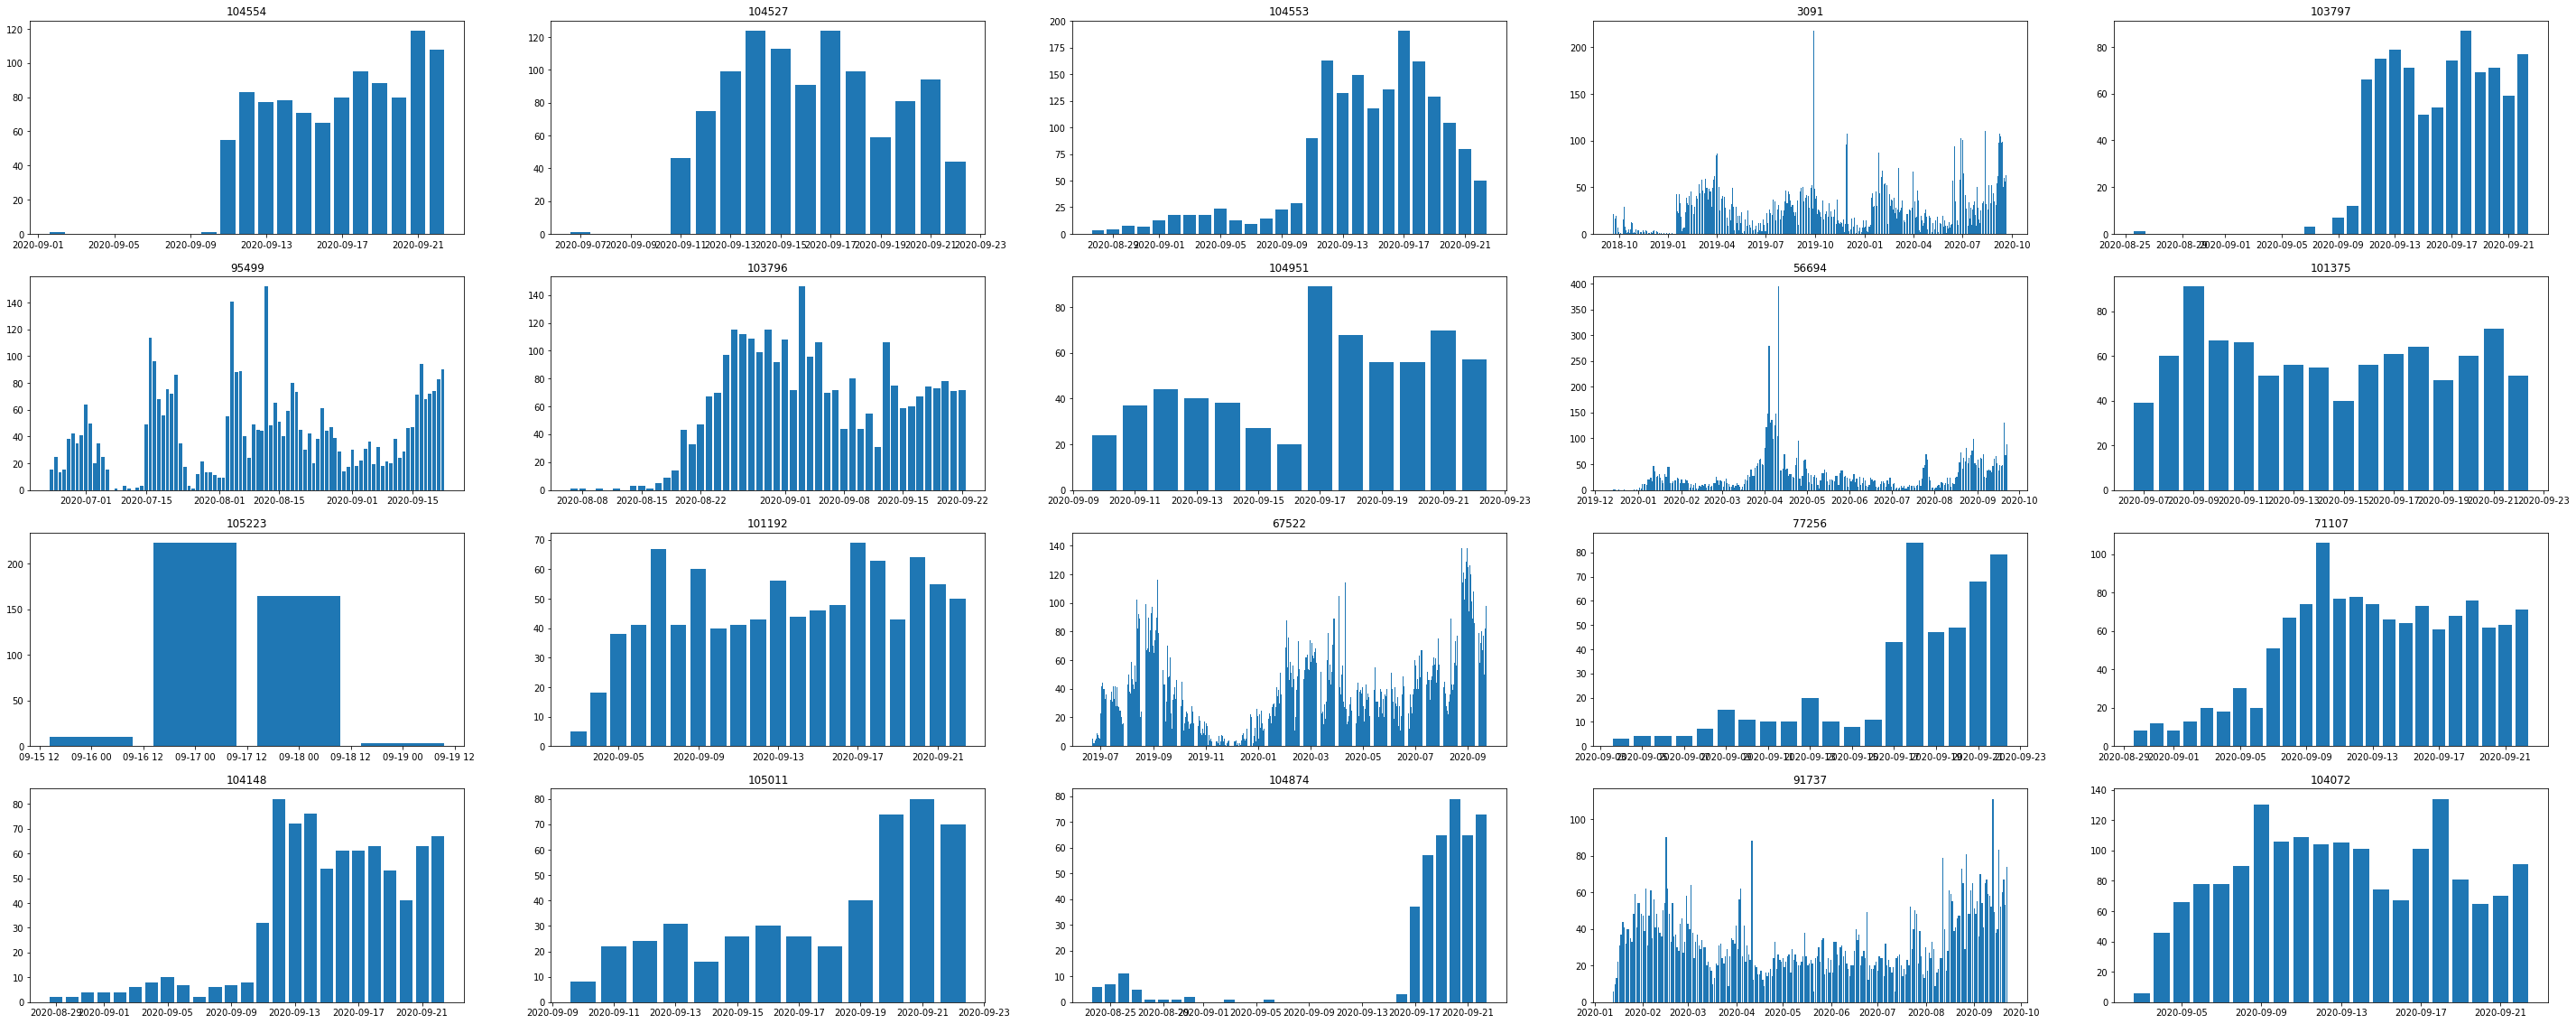

In [98]:
plt.figure(figsize=(50, 20))
for idx, article_id in enumerate(article_id_idxs[:20]):
    plt.subplot(4, 5, idx + 1)
    a = transactions.query("article_id_idx == @article_id").groupby('t_dat').size().reset_index(name='count').sort_values(by='t_dat')
    plt.title(article_id)
    plt.bar(a.t_dat, a['count'])
plt.show()

In [99]:
article_id_idxs_0 = transactions_recent.query("sales_channel_id == 0").groupby('article_id_idx').size().reset_index(name='count').sort_values(by='count', ascending=False).article_id_idx.values
article_id_idxs_1 = transactions_recent.query("sales_channel_id == 1").groupby('article_id_idx').size().reset_index(name='count').sort_values(by='count', ascending=False).article_id_idx.values

In [105]:
len(set(article_id_idxs_0[:100]) & set(article_id_idxs_1[:100]))

27

チャネルによっても顔ぶれが違う

どう扱うかは未定だが（モデル分けるとかはある）、気にはしておく